In [86]:
# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd

# data    =  pd.read_csv('data.txt',sep=',',engine='python',encoding='cp949',names=['x','y','label'])
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

## 1. plot the training data

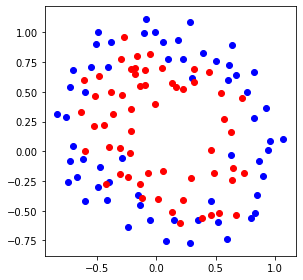

In [87]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 2. write down the high dimensional function

$g(x,y,\theta)=\theta_0 + \theta_1x^2 + \theta_2y^2 + \theta_3xy$

In [224]:
pointX = (pointX-pointX.mean()) / pointX.std()
pointY = (pointY-pointY.mean()) / pointY.std()
train_matrix = np.c_[np.ones(pointX.shape[0]),pointX,pointY]
train_matrix

array([[ 1.        , -0.00710129,  0.99791805],
       [ 1.        , -0.29829632,  0.9696688 ],
       [ 1.        , -0.54290103,  0.98379343],
       [ 1.        , -0.8690393 ,  0.61655322],
       [ 1.        , -1.14858928,  0.5459301 ],
       [ 1.        , -1.17188342,  0.05158761],
       [ 1.        , -0.91562759, -0.28740915],
       [ 1.        , -0.72927442, -0.72526668],
       [ 1.        , -0.07698778, -1.13488075],
       [ 1.        ,  0.1559638 , -1.3467501 ],
       [ 1.        ,  0.66847545, -1.44562247],
       [ 1.        ,  0.9596725 , -1.36087473],
       [ 1.        ,  1.18096689, -0.82413904],
       [ 1.        ,  1.37898735, -0.71114205],
       [ 1.        ,  0.99461372,  0.58830397],
       [ 1.        ,  0.54033743,  0.77192408],
       [ 1.        ,  0.22584623,  0.68717634],
       [ 1.        , -0.20511367,  1.22391203],
       [ 1.        , -0.46137152,  0.99791805],
       [ 1.        , -1.07870684,  0.87079644],
       [ 1.        , -1.33494245,  0.800

In [257]:
degree = 3
alpha = 0.001
iteration = 1000
m = label.size
#theta 랜덤 생성
np.random.seed(777)
theta = [-1,1,1,0]
theta

[-1, 1, 1, 0]

In [258]:
def high_demension(x,y,degree):
    res = np.c_[np.ones(x.shape[0]),x**2,y**2,x*y]
    return res

highf = high_demension(pointX,pointY,degree)
highf[0]

array([ 1.00000000e+00,  5.04283798e-05,  9.95840438e-01, -7.08650970e-03])

In [259]:
def cost(label,gx):
    j = np.mean(((-label*np.log(gx))-((1-label)*np.log(1-gx))))
    return j
def sigmoid(z):
    return 1 / (1+np.exp(-z))


In [260]:
def gradient_descent(matrix,label,theta,iterations,alpha):
    cost_history=[]
    theta_history=[theta]
    accuracy_history=[]
    for i in range(iterations):
        prediction = np.dot(matrix,theta)
        sig = sigmoid(prediction)
        error = sig - label
        accuracy_history.append(sig)
        cost_history.append(cost(label,sig))
        theta = theta - (alpha*(1/m)*np.dot(matrix.T,error))
        theta_history.append(theta)
    return theta_history, cost_history , accuracy_history

In [261]:
theta_history , cost_history, accuracy_history = gradient_descent(highf,label,theta,iteration,alpha)

In [262]:

correct_history =[]
for i in range(iteration):
    correct = 0
    for j in range(len(accuracy_history[0])):
        if(((accuracy_history[i][j] <= 0.5) and (label[j] == 1)) or ((accuracy_history[i][j] > 0.5) and (label[j] == 0))):
            correct += 1
    correct_history.append(correct)        


for i in range(iteration):
     correct_history[i] = (correct_history[i] / len(accuracy_history[0])) * 100
    
correct_history

[67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 67.79661016949152,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 68.64406779661016,
 69.49152542372882,
 69.49152542372882,
 69.49152542372882,


## 4 .plot the training accuracy

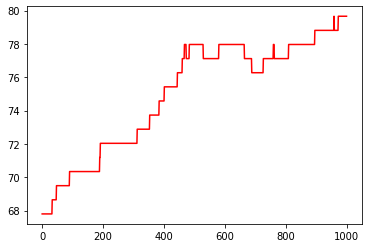

In [265]:
# for i in range(len(accuracy_history[0])):
plt.plot(correct_history,c='r')

